In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.linear_model import LogisticRegression
from category_encoders import OneHotEncoder,CatBoostEncoder,OrdinalEncoder,SumEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

from sklearn.cluster import KMeans
from sklearn.metrics import mutual_info_score

from sklearn.model_selection import RandomizedSearchCV
from scipy import stats
from scipy.stats import uniform as sp_randfloat
from scipy.stats import randint as sp_randint

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

from sklearn.svm import SVC

import xgboost as xgb
from sklearn.preprocessing import StandardScaler

In [12]:
#pip install category_encoders
#!pip install xgboost

  Using cached xgboost-1.6.2-py3-none-manylinux2014_x86_64.whl (255.9 MB)


In [72]:
df = pd.read_csv("train.csv").set_index('Entry_id')
df.head()

,age,pay_schedule,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
Entry_id,,,,,,,,,,,,,,,,,,,,
7629673,40,bi-weekly,1,3135,0,3,3,6,2,1,550,36200,0.737398,0.903517,0.487712,0.515977,0.580918,0.380918,10,1
5335819,33,semi-monthly,0,3590,0,5,2,2,8,1,1100,53850,0.617361,0.857560,0.613487,0.665523,0.744634,0.744634,12,0
8492423,21,weekly,0,2303,0,5,8,2,7,1,600,74850,0.677109,0.758765,0.495609,0.664762,0.592556,0.492556,6,1
7948313,26,bi-weekly,0,2795,0,4,4,1,6,1,800,50800,0.738055,0.873204,0.666437,0.700392,0.584130,0.684130,14,1
4297036,43,bi-weekly,0,5000,0,2,1,1,2,1,1100,69100,0.798303,0.841747,0.401971,0.568787,0.525905,0.725905,5,1


In [85]:
df['request_ratio']=df['amount_requested']/df['income']

In [86]:
df['duration_employed'] = df['years_employed'] + (df['months_employed']/12)

In [87]:
df['personal_account_d'] = df['personal_account_y'] + (df['personal_account_m']/12)

In [88]:
df['avg_risk'] = (df['risk_score']+df['risk_score_2']+df['risk_score_3']+df['risk_score_4']+df['risk_score_5'])/5

In [69]:
df.head()

,age,pay_schedule,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,has_debt,...,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed,request_ratio,duration_employed,personal_account_d,avg_risk
Entry_id,,,,,,,,,,,,,,,,,,,,,
7629673,40,bi-weekly,1,3135,0,3,3,6,2,1,...,0.487712,0.515977,0.580918,0.380918,10,1,0.175439,3.0,2.500000,7240.528921
5335819,33,semi-monthly,0,3590,0,5,2,2,8,1,...,0.613487,0.665523,0.744634,0.744634,12,0,0.306407,5.0,8.166667,10770.550786
8492423,21,weekly,0,2303,0,5,8,2,7,1,...,0.495609,0.664762,0.592556,0.492556,6,1,0.260530,5.0,7.166667,14970.519249
7948313,26,bi-weekly,0,2795,0,4,4,1,6,1,...,0.666437,0.700392,0.584130,0.684130,14,1,0.286225,4.0,6.083333,10160.595618
4297036,43,bi-weekly,0,5000,0,2,1,1,2,1,...,0.401971,0.568787,0.525905,0.725905,5,1,0.220000,2.0,2.083333,13820.522162


In [143]:

def mutual_info(series):
    return mutual_info_score(series,df['e_signed'])
df.apply(mutual_info)

/srv/conda/envs/notebook/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/srv/conda/envs/notebook/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/srv/conda/envs/notebook/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/srv/conda/envs/notebook/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warn

age                     0.007713
pay_schedule            0.000352
home_owner              0.001500
income                  0.100868
months_employed         0.001164
years_employed          0.001212
current_address_year    0.000613
personal_account_m      0.007018
personal_account_y      0.007046
has_debt                0.000542
amount_requested        0.046757
risk_score              0.065406
risk_score_2            0.677028
risk_score_3            0.185455
risk_score_4            0.682676
risk_score_5            0.680656
ext_quality_score       0.678357
ext_quality_score_2     0.679617
inquiries_last_month    0.001734
e_signed                0.689849
request_ratio           0.342117
homedebt_cluster        0.001957
duration_employed       0.009167
personal_account_d      0.017726
dtype: float64

In [122]:
kmeans = KMeans(n_clusters=4)
df["homedebt_cluster"] = kmeans.fit_predict(df[['home_owner','has_debt']])

In [132]:
df['duration_employed'].nunique()

162

In [84]:
df.columns

Index(['age', 'pay_schedule', 'home_owner', 'income', 'months_employed',
       'years_employed', 'current_address_year', 'personal_account_m',
       'personal_account_y', 'has_debt', 'amount_requested', 'risk_score',
       'risk_score_2', 'risk_score_3', 'risk_score_4', 'risk_score_5',
       'ext_quality_score', 'ext_quality_score_2', 'inquiries_last_month',
       'e_signed'],
      dtype='object')

In [83]:
#col = ['request_ratio','risk_score_2','risk_score_3',
#       'risk_score_4','risk_score_5','ext_quality_score','ext_quality_score_2',
 #       'income','age','home_owner','months_employed','years_employed','personal_account_y',
 #        'personal_account_m','amount_requested','risk_score','inquiries_last_month',
 #         'homedebt_cluster','duration_employed','personal_account_d']
target = "e_signed"
X = df.drop(columns=target)
y = df[target]
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)
for r in range(1,25):
    model = make_pipeline(OneHotEncoder(),GradientBoostingClassifier(max_depth=6,random_state=r))
    model.fit(X_train,y_train)
    acc_train = accuracy_score(y_train, model.predict(X_train))
    acc_val = model.score(X_val, y_val)

    print("Training Accuracy:",acc_train)
    print("Validation Accuracy:", acc_val)

/srv/conda/envs/notebook/lib/python3.9/site-packages/category_encoders/one_hot.py:145: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cat_name, class_ in values.iteritems():


Training Accuracy: 0.8398921294446664
Validation Accuracy: 0.6385782747603834


/srv/conda/envs/notebook/lib/python3.9/site-packages/category_encoders/one_hot.py:145: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cat_name, class_ in values.iteritems():


Training Accuracy: 0.8420894926088693
Validation Accuracy: 0.6477635782747604


/srv/conda/envs/notebook/lib/python3.9/site-packages/category_encoders/one_hot.py:145: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cat_name, class_ in values.iteritems():


Training Accuracy: 0.8420894926088693
Validation Accuracy: 0.6481629392971247


/srv/conda/envs/notebook/lib/python3.9/site-packages/category_encoders/one_hot.py:145: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cat_name, class_ in values.iteritems():


Training Accuracy: 0.8328006392329205
Validation Accuracy: 0.6425718849840255


/srv/conda/envs/notebook/lib/python3.9/site-packages/category_encoders/one_hot.py:145: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cat_name, class_ in values.iteritems():


Training Accuracy: 0.8420894926088693
Validation Accuracy: 0.6481629392971247


/srv/conda/envs/notebook/lib/python3.9/site-packages/category_encoders/one_hot.py:145: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cat_name, class_ in values.iteritems():


Training Accuracy: 0.8420894926088693
Validation Accuracy: 0.6481629392971247


/srv/conda/envs/notebook/lib/python3.9/site-packages/category_encoders/one_hot.py:145: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cat_name, class_ in values.iteritems():


Training Accuracy: 0.8328006392329205
Validation Accuracy: 0.6417731629392971


/srv/conda/envs/notebook/lib/python3.9/site-packages/category_encoders/one_hot.py:145: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cat_name, class_ in values.iteritems():


Training Accuracy: 0.8420894926088693
Validation Accuracy: 0.6473642172523961


/srv/conda/envs/notebook/lib/python3.9/site-packages/category_encoders/one_hot.py:145: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cat_name, class_ in values.iteritems():


Training Accuracy: 0.8420894926088693
Validation Accuracy: 0.6489616613418531


/srv/conda/envs/notebook/lib/python3.9/site-packages/category_encoders/one_hot.py:145: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cat_name, class_ in values.iteritems():


Training Accuracy: 0.8420894926088693
Validation Accuracy: 0.6449680511182109


/srv/conda/envs/notebook/lib/python3.9/site-packages/category_encoders/one_hot.py:145: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cat_name, class_ in values.iteritems():


Training Accuracy: 0.8398921294446664
Validation Accuracy: 0.6393769968051118


/srv/conda/envs/notebook/lib/python3.9/site-packages/category_encoders/one_hot.py:145: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cat_name, class_ in values.iteritems():


Training Accuracy: 0.8328006392329205
Validation Accuracy: 0.6417731629392971


/srv/conda/envs/notebook/lib/python3.9/site-packages/category_encoders/one_hot.py:145: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cat_name, class_ in values.iteritems():


Training Accuracy: 0.8398921294446664
Validation Accuracy: 0.6405750798722045


/srv/conda/envs/notebook/lib/python3.9/site-packages/category_encoders/one_hot.py:145: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cat_name, class_ in values.iteritems():


Training Accuracy: 0.8398921294446664
Validation Accuracy: 0.6405750798722045


/srv/conda/envs/notebook/lib/python3.9/site-packages/category_encoders/one_hot.py:145: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cat_name, class_ in values.iteritems():


Training Accuracy: 0.8420894926088693
Validation Accuracy: 0.645367412140575


/srv/conda/envs/notebook/lib/python3.9/site-packages/category_encoders/one_hot.py:145: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cat_name, class_ in values.iteritems():


Training Accuracy: 0.8398921294446664
Validation Accuracy: 0.639776357827476


/srv/conda/envs/notebook/lib/python3.9/site-packages/category_encoders/one_hot.py:145: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cat_name, class_ in values.iteritems():


Training Accuracy: 0.8398921294446664
Validation Accuracy: 0.6413738019169329


/srv/conda/envs/notebook/lib/python3.9/site-packages/category_encoders/one_hot.py:145: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cat_name, class_ in values.iteritems():


Training Accuracy: 0.8420894926088693
Validation Accuracy: 0.646964856230032


/srv/conda/envs/notebook/lib/python3.9/site-packages/category_encoders/one_hot.py:145: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cat_name, class_ in values.iteritems():


Training Accuracy: 0.8420894926088693
Validation Accuracy: 0.6477635782747604


/srv/conda/envs/notebook/lib/python3.9/site-packages/category_encoders/one_hot.py:145: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cat_name, class_ in values.iteritems():


Training Accuracy: 0.8398921294446664
Validation Accuracy: 0.6381789137380192


/srv/conda/envs/notebook/lib/python3.9/site-packages/category_encoders/one_hot.py:145: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cat_name, class_ in values.iteritems():


Training Accuracy: 0.8398921294446664
Validation Accuracy: 0.6409744408945687


/srv/conda/envs/notebook/lib/python3.9/site-packages/category_encoders/one_hot.py:145: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cat_name, class_ in values.iteritems():


KeyboardInterrupt: 

In [74]:
df.columns

Index(['age', 'pay_schedule', 'home_owner', 'income', 'months_employed',
       'years_employed', 'current_address_year', 'personal_account_m',
       'personal_account_y', 'has_debt', 'amount_requested', 'risk_score',
       'risk_score_2', 'risk_score_3', 'risk_score_4', 'risk_score_5',
       'ext_quality_score', 'ext_quality_score_2', 'inquiries_last_month',
       'e_signed'],
      dtype='object')

In [ ]:
target = "e_signed"
X = df.drop(columns=[target, 'request_ratio', 'duration_employed', 'personal_account_d'])
y = df[target]
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)

modelx = make_pipeline(
                       
                       xgb.XGBClassifier(StandardScaler(),))
modelx.fit(X_train,y_train)
                       
                       

acc_train = accuracy_score(y_train, modelx.predict(X_train))
acc_val = modelx.score(X_val, y_val)

print("Training Accuracy:",acc_train)
print("Validation Accuracy:", acc_val)

In [32]:
y_train.shape

(10012,)

In [88]:
randm.cv_results_

{'mean_fit_time': array([0.8245059 , 1.25839553, 0.89114861, 1.71221867, 1.05558691,
        2.12310185, 1.95580392, 1.0730516 , 0.68309855, 1.15992556]),
 'std_fit_time': array([0.01112252, 0.01308326, 0.01507732, 0.01840408, 0.02044889,
        0.00876153, 0.08259379, 0.00797131, 0.05988693, 0.07787511]),
 'mean_score_time': array([0.00693326, 0.00851784, 0.00695357, 0.01302042, 0.00747662,
        0.01304469, 0.00744309, 0.00863056, 0.00531163, 0.00504513]),
 'std_score_time': array([2.45739564e-04, 2.14172013e-04, 7.93836633e-05, 5.70560848e-04,
        2.13084297e-04, 4.07164339e-04, 2.15730038e-03, 1.87888810e-04,
        1.30076317e-03, 3.99677727e-05]),
 'param_learning_rate': masked_array(data=[0.30337498012674813, 0.1556087507653785,
                    0.6704769384898571, 0.12234631861838996,
                    0.9058545237523605, 0.07633597614521359,
                    0.6631079416398787, 0.1927459560418805,
                    0.20148190085605366, 0.3963215073996622],
  

In [45]:
df.groupby('e_signed')["Cluster"].describe()

,count,unique,top,freq
e_signed,,,,
0,5750,6,5,1205
1,6766,6,3,1388


In [38]:
df["income"].nunique()

1940

<AxesSubplot: xlabel='e_signed', ylabel='income'>

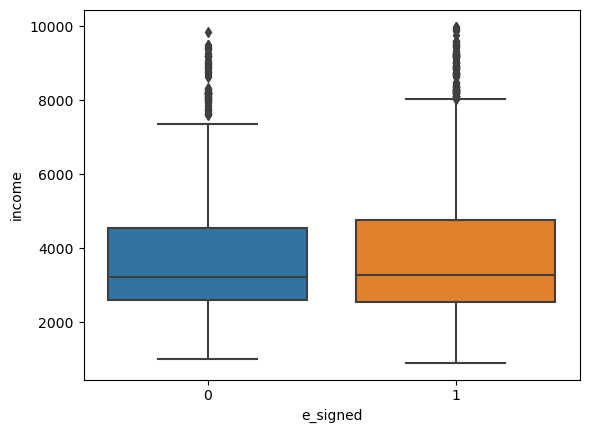

In [41]:
sns.boxplot(y="income",data=df,x='e_signed')

<AxesSubplot: xlabel='e_signed', ylabel='age'>

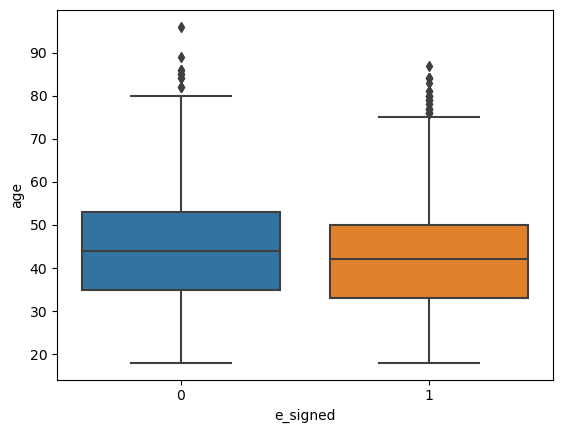

In [63]:
sns.boxplot(y="age",data=df,x='e_signed')

<AxesSubplot: xlabel='e_signed', ylabel='request_ratio'>

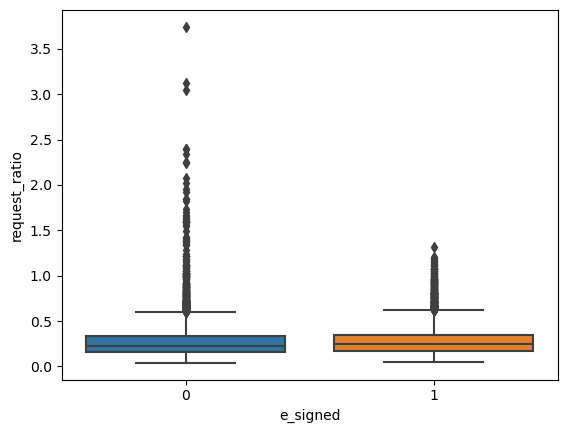

In [69]:
sns.boxplot(y="age",data=df,x='e_signed')

<AxesSubplot: xlabel='pay_schedule', ylabel='income'>

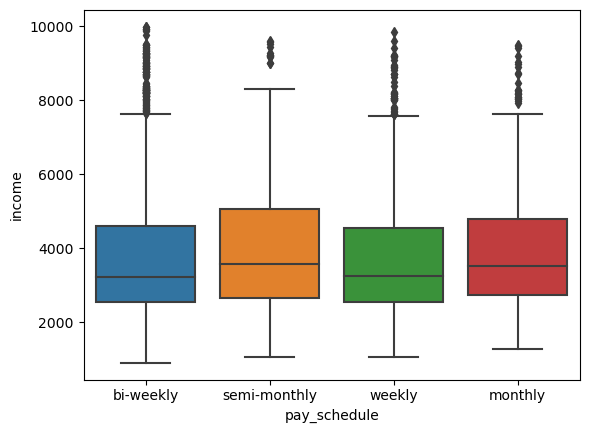

In [70]:
sns.boxplot(y="income",data=df,x='pay_schedule')

<AxesSubplot: >

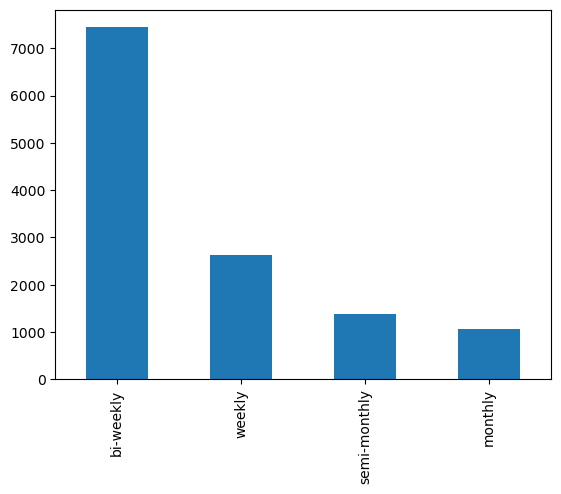

In [68]:
df['pay_schedule'].value_counts().plot(kind='bar')

In [137]:
target = "e_signed"
X = df.drop(columns=target)
y = df[target]
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_val.shape)
print("y_test shape:", y_val.shape)

X_train shape: (10012, 23)
y_train shape: (10012,)
X_test shape: (2504, 23)
y_test shape: (2504,)


In [153]:
target = "e_signed"
X = df.drop(columns=target)
y = df[target]
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)
model1 = make_pipeline(OneHotEncoder(use_cat_names=True),
                       SVC())
model1.fit(X_train,y_train)
acc_train = accuracy_score(y_train, model1.predict(X_train))
acc_val = model1.score(X_val, y_val)

print("Training Accuracy:", round(acc_train, 2))
print("Validation Accuracy:", acc_val)


/srv/conda/envs/notebook/lib/python3.9/site-packages/category_encoders/one_hot.py:145: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cat_name, class_ in values.iteritems():


Training Accuracy: 0.55
Validation Accuracy: 0.5674920127795527


In [17]:
acc_baseline = y_train.value_counts(normalize=True).max()
print("Baseline Accuracy:", round(acc_baseline, 2))

Baseline Accuracy: 0.54


In [142]:
model1 = make_pipeline(OneHotEncoder(use_cat_names=True),
                       GradientBoostingClassifier(random_state=3))
model1.fit(X_train,y_train)
acc_train = accuracy_score(y_train, model1.predict(X_train))
acc_val = model1.score(X_val, y_val)

print("Training Accuracy:", round(acc_train, 2))
print("Validation Accuracy:", acc_val)

/srv/conda/envs/notebook/lib/python3.9/site-packages/category_encoders/one_hot.py:145: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cat_name, class_ in values.iteritems():


Training Accuracy: 0.68
Validation Accuracy: 0.6461661341853036


In [ ]:
df_test = pd.read_csv('test.csv')
predictions1 = model1.predict(df_test[X_train.columns])
results_df = pd.DataFrame({'e_signed':predictions1}).set_index(df_test['Entry_id'])
results_df.to_csv('submissions.csv')